## Live loss plotting during training

In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git['live'] # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    
import pandas as pd
from neuralprophet import NeuralProphet

In [2]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df = pd.read_csv(data_location + "retail_sales.csv")

In [3]:
m = NeuralProphet()
df_train, df_val = m.split_df(df, valid_p=0.1)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.126% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS


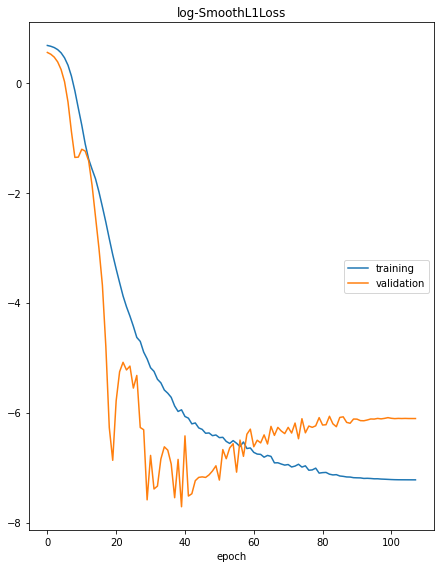

Epoch[108/108]: 100%|█| 108/108 [00:05<00:00, 19.16it/s, SmoothL1Loss=0.00073, 


In [4]:
metrics = m.fit(df_train, validation_df=df_val, plot_live_loss=True)

In [ ]:
metrics = m.fit(df_train, validation_df=df_val, plot_live_loss=True, plot_live_)

In [5]:
metrics

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
0,1.972792,664801.580487,718306.234047,0.0,1.736928,600179.991161,658407.540556
1,1.943564,656763.169126,711633.831229,0.0,1.682058,585031.572233,644339.779697
2,1.899070,644565.487804,703452.600715,0.0,1.595263,560875.429029,622370.521428
3,1.829281,625249.335769,684395.743909,0.0,1.462713,523710.602657,588044.907053
4,1.724445,596306.774514,659101.515181,0.0,1.271422,468862.419821,538662.927699
...,...,...,...,...,...,...,...
103,0.000731,7719.069953,10152.531266,0.0,0.002227,15004.566353,17977.044398
104,0.000731,7716.955231,9979.541267,0.0,0.002232,15014.137000,17995.135529
105,0.000730,7714.824211,10005.234848,0.0,0.002227,15000.927326,17978.570868
106,0.000730,7713.327491,9958.554804,0.0,0.002227,14999.040546,17976.392588


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.126% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.126% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


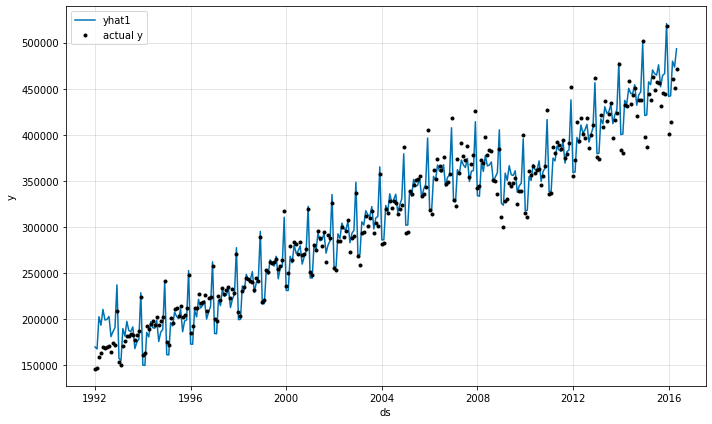

In [6]:
forecast = m.predict(df)
fig = m.plot(forecast)